In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 경로 설정 (Windows의 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)

# 폰트 패밀리 설정
plt.rcParams['font.family'] = ['DejaVu Sans', fontprop.get_name()]

C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  plt.tight_layout()
C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.tight_layout()
C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  plt.tight_layout()
C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  plt.tight_layout()
C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  plt.tight_layout()
C:\Users\dongi\AppData\Local\Temp\ipykernel_31616\2729061219.py:43: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from current font.
  plt.tight_layout()


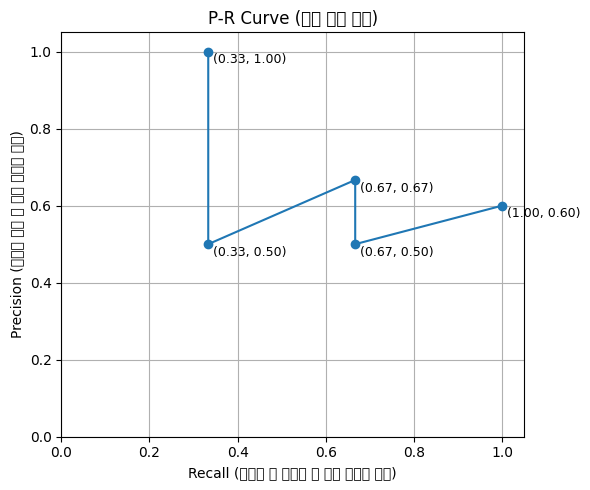

In [3]:
# 가상의 경찰 체포 사례 예시
# 예측 점수와 실제 범죄자 여부
samples = [
    {"id": 1, "score": 0.9, "label": 1},  # 진짜 범죄자
    {"id": 2, "score": 0.8, "label": 0},  # 무고한 시민
    {"id": 3, "score": 0.7, "label": 1},  # 진짜 범죄자
    {"id": 4, "score": 0.4, "label": 0},  # 무고한 시민
    {"id": 5, "score": 0.2, "label": 1},  # 진짜 범죄자
]

# score 기준 내림차순 정렬
samples = sorted(samples, key=lambda x: -x["score"])

# 누적 TP, FP, Precision, Recall 계산
TP = 0
FP = 0
precision_points = []
recall_points = []

total_positive = sum([s["label"] for s in samples])

for i in range(1, len(samples) + 1):
    top_k = samples[:i]
    TP = sum(1 for s in top_k if s["label"] == 1)
    FP = i - TP
    precision = TP / i
    recall = TP / total_positive
    precision_points.append(precision)
    recall_points.append(recall)

# P-R 커브 그리기
plt.figure(figsize=(6, 5))
plt.plot(recall_points, precision_points, marker='o')
for r, p in zip(recall_points, precision_points):
    plt.text(r + 0.01, p - 0.03, f"({r:.2f}, {p:.2f})", fontsize=9)

plt.title("P-R Curve (경찰 체포 예시)")
plt.xlabel("Recall (잡아야 할 범죄자 중 실제 체포된 비율)")
plt.ylabel("Precision (체포된 사람 중 진짜 범죄자 비율)")
plt.grid(True)
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()
